<a href="https://colab.research.google.com/github/jdre1/Machine-Learning-Bootcamp/blob/main/supervised/01_basic/extracting_featurtes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import plotly as px
import os
import matplotlib.pyplot as plt

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source ='stooq')

df_raw = fetch_financial_data()
df_raw.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-22,2965.00,2992.3000,2873.9501,2887.00,3653929
2022-04-21,3094.28,3134.7600,2951.7900,2965.92,3198466
2022-04-20,3152.05,3152.0500,3072.0700,3079.96,2981501
2022-04-19,3040.59,3172.9800,3031.0100,3162.31,2746321
2022-04-18,3030.47,3080.7900,3005.0100,3055.70,2325676
2022-04-14,3107.80,3117.9400,3029.4350,3034.13,2579907
2022-04-13,3000.37,3120.5000,2992.0000,3110.82,2669544
2022-04-12,3073.85,3101.9800,3007.6600,3015.75,2758872
2022-04-11,3054.26,3082.7299,3010.6900,3022.44,2605617


##### Plotting excersize by usage Pandas library

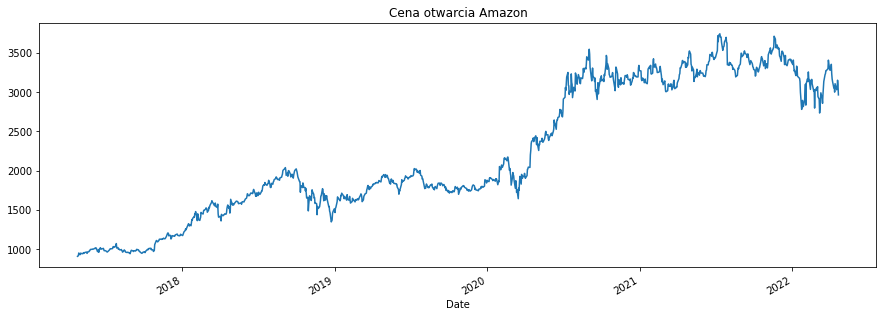

In [3]:
_ = df_raw.Open.plot(title = 'Cena otwarcia Amazon', figsize = [15,5])



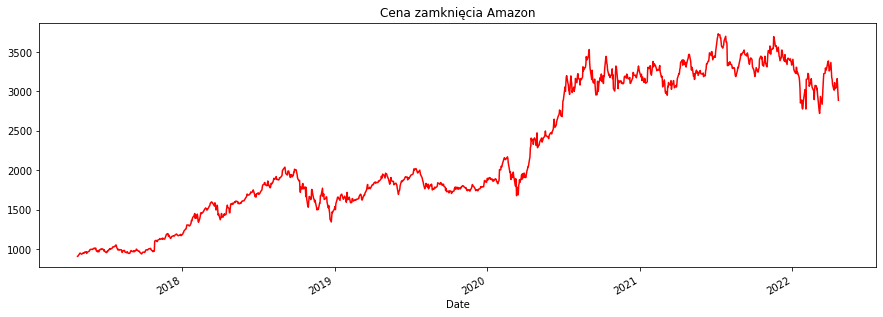

In [4]:
__ = df_raw.Close.plot(title = 'Cena zamknięcia Amazon', color='red', figsize = [15,5])

In [5]:
df_raw['Diff'] = ((df_raw['Open'] - df_raw['Close'])/df_raw.Open)*100
df_raw

,Open,High,Low,Close,Volume,Diff
Date,,,,,,
2022-04-22,2965.00,2992.300,2873.9501,2887.00,3653929,2.630691
2022-04-21,3094.28,3134.760,2951.7900,2965.92,3198466,4.148299
2022-04-20,3152.05,3152.050,3072.0700,3079.96,2981501,2.287083
2022-04-19,3040.59,3172.980,3031.0100,3162.31,2746321,-4.003170
2022-04-18,3030.47,3080.790,3005.0100,3055.70,2325676,-0.832544
...,...,...,...,...,...,...
2017-05-01,927.80,954.400,927.8000,948.23,5461391,-2.201983
2017-04-28,948.83,949.590,924.3340,924.99,7364681,2.512568
2017-04-27,914.39,921.860,912.1100,918.38,5210059,-0.436356


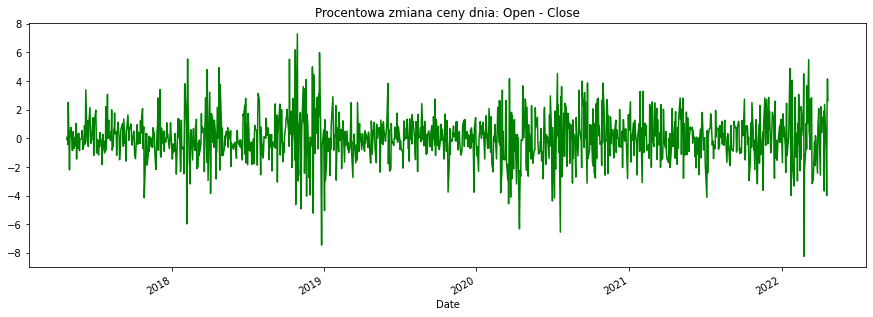

In [6]:
_ = df_raw['Diff'].plot(title = 'Procentowa zmiana ceny dnia: Open - Close', figsize=[15,5], color='green')

In [7]:
df_raw['Diff_H_L'] = ((df_raw['High'] - df_raw['Low']))
df_raw

,Open,High,Low,Close,Volume,Diff,Diff_H_L
Date,,,,,,,
2022-04-22,2965.00,2992.300,2873.9501,2887.00,3653929,2.630691,118.3499
2022-04-21,3094.28,3134.760,2951.7900,2965.92,3198466,4.148299,182.9700
2022-04-20,3152.05,3152.050,3072.0700,3079.96,2981501,2.287083,79.9800
2022-04-19,3040.59,3172.980,3031.0100,3162.31,2746321,-4.003170,141.9700
2022-04-18,3030.47,3080.790,3005.0100,3055.70,2325676,-0.832544,75.7800
...,...,...,...,...,...,...,...
2017-05-01,927.80,954.400,927.8000,948.23,5461391,-2.201983,26.6000
2017-04-28,948.83,949.590,924.3340,924.99,7364681,2.512568,25.2560
2017-04-27,914.39,921.860,912.1100,918.38,5210059,-0.436356,9.7500


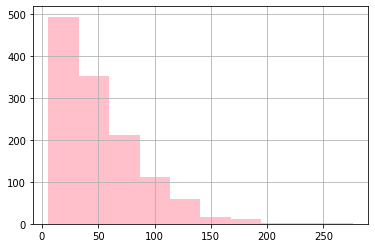

In [8]:
_ = df_raw['Diff_H_L'].hist(grid=True, color = 'pink')

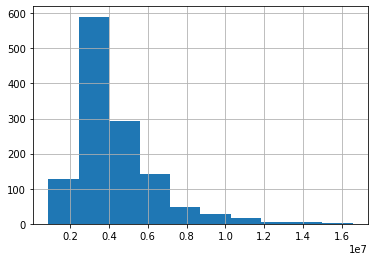

In [9]:
_ = df_raw.Volume.hist(grid = True)

In [10]:
data_ = pd.date_range(start='2021-03-30', end='2021-05-31', periods=10)
data_
insert = {'insert':[1,2,4,7,15,np.nan,5,6,10,46]}
df_aw_1 = pd.DataFrame(index=data_)

In [11]:
df_aw_1 = pd.DataFrame(index=data_, data = insert)
df_aw_1

,insert
2021-03-30 00:00:00,1.0
2021-04-05 21:20:00,2.0
2021-04-12 18:40:00,4.0
2021-04-19 16:00:00,7.0
2021-04-26 13:20:00,15.0
2021-05-03 10:40:00,NaN
2021-05-10 08:00:00,5.0
2021-05-17 05:20:00,6.0
2021-05-24 02:40:00,10.0
2021-05-31 00:00:00,46.0


##### Diffrerence in filling missing data in time series 5 methods and visualzation

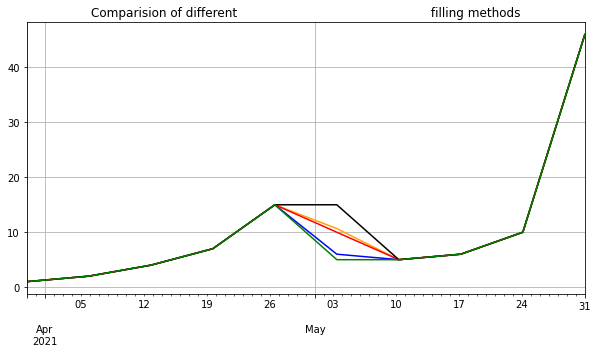

In [12]:
import plotly.express as px

_ = df_aw_1['insert'].fillna(df_aw_1['insert'].median()).plot(grid=True, 
                                                              color = 'blue', figsize=[10,5])
_ = df_aw_1['insert'].fillna(df_aw_1['insert'].mean()).plot(grid=True, 
                                                            color='orange')
_ = df_aw_1['insert'].fillna(df_aw_1['insert'].interpolate()).plot(grid=True, 
                                                                   color='red')
_ = df_aw_1['insert'].fillna(method='ffill').plot(grid=True, color='black')
_ = df_aw_1['insert'].fillna(method='bfill').plot(grid=True, color='green', 
                                                  title='Comparision of different\
                                                  filling methods')

##### plotly excersize 

In [13]:
px.line(df_raw)


In [14]:
df_aw_1

,insert
2021-03-30 00:00:00,1.0
2021-04-05 21:20:00,2.0
2021-04-12 18:40:00,4.0
2021-04-19 16:00:00,7.0
2021-04-26 13:20:00,15.0
2021-05-03 10:40:00,NaN
2021-05-10 08:00:00,5.0
2021-05-17 05:20:00,6.0
2021-05-24 02:40:00,10.0
2021-05-31 00:00:00,46.0


##### Extraction of dates example in Pandas library

In [15]:
df_aw_1['day'] = df_aw_1.index.day
df_aw_1['month'] = df_aw_1.index.month_name()
df_aw_1['year'] = df_aw_1.index.year
df_aw_1

,insert,day,month,year
2021-03-30 00:00:00,1.0,30,March,2021
2021-04-05 21:20:00,2.0,5,April,2021
2021-04-12 18:40:00,4.0,12,April,2021
2021-04-19 16:00:00,7.0,19,April,2021
2021-04-26 13:20:00,15.0,26,April,2021
2021-05-03 10:40:00,NaN,3,May,2021
2021-05-10 08:00:00,5.0,10,May,2021
2021-05-17 05:20:00,6.0,17,May,2021
2021-05-24 02:40:00,10.0,24,May,2021
2021-05-31 00:00:00,46.0,31,May,2021


In [16]:
df_raw.head()

,Open,High,Low,Close,Volume,Diff,Diff_H_L
Date,,,,,,,
2022-04-22,2965.00,2992.30,2873.9501,2887.00,3653929,2.630691,118.3499
2022-04-21,3094.28,3134.76,2951.7900,2965.92,3198466,4.148299,182.9700
2022-04-20,3152.05,3152.05,3072.0700,3079.96,2981501,2.287083,79.9800
2022-04-19,3040.59,3172.98,3031.0100,3162.31,2746321,-4.003170,141.9700
2022-04-18,3030.47,3080.79,3005.0100,3055.70,2325676,-0.832544,75.7800


In [17]:
df_raw['Day'] = df_raw.index.day
df_raw['Month'] = df_raw.index.month_name()
df_raw['Year'] = df_raw.index.year
df_raw

,Open,High,Low,Close,Volume,Diff,Diff_H_L,Day,Month,Year
Date,,,,,,,,,,
2022-04-22,2965.00,2992.300,2873.9501,2887.00,3653929,2.630691,118.3499,22,April,2022
2022-04-21,3094.28,3134.760,2951.7900,2965.92,3198466,4.148299,182.9700,21,April,2022
2022-04-20,3152.05,3152.050,3072.0700,3079.96,2981501,2.287083,79.9800,20,April,2022
2022-04-19,3040.59,3172.980,3031.0100,3162.31,2746321,-4.003170,141.9700,19,April,2022
2022-04-18,3030.47,3080.790,3005.0100,3055.70,2325676,-0.832544,75.7800,18,April,2022
...,...,...,...,...,...,...,...,...,...,...
2017-05-01,927.80,954.400,927.8000,948.23,5461391,-2.201983,26.6000,1,May,2017
2017-04-28,948.83,949.590,924.3340,924.99,7364681,2.512568,25.2560,28,April,2017
2017-04-27,914.39,921.860,912.1100,918.38,5210059,-0.436356,9.7500,27,April,2017


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2022-04-22 to 2017-04-25
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      1259 non-null   float64
 1   High      1259 non-null   float64
 2   Low       1259 non-null   float64
 3   Close     1259 non-null   float64
 4   Volume    1259 non-null   int64  
 5   Diff      1259 non-null   float64
 6   Diff_H_L  1259 non-null   float64
 7   Day       1259 non-null   int64  
 8   Month     1259 non-null   object 
 9   Year      1259 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 108.2+ KB


In [19]:
df_raw['Month'] = df_raw['Month'].astype('category', copy = True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2022-04-22 to 2017-04-25
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Open      1259 non-null   float64 
 1   High      1259 non-null   float64 
 2   Low       1259 non-null   float64 
 3   Close     1259 non-null   float64 
 4   Volume    1259 non-null   int64   
 5   Diff      1259 non-null   float64 
 6   Diff_H_L  1259 non-null   float64 
 7   Day       1259 non-null   int64   
 8   Month     1259 non-null   category
 9   Year      1259 non-null   int64   
dtypes: category(1), float64(6), int64(3)
memory usage: 100.0 KB


In [20]:
df = pd.DataFrame(data={'height': [175., 178.5, 185., 191., 184.5, 183., 168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [21]:
df['wzrost'] = pd.cut(df['height'], bins=3, labels=('niski','sredni','wysoki'))
df

,height,wzrost
0,175.0,niski
1,178.5,sredni
2,185.0,wysoki
3,191.0,wysoki
4,184.5,wysoki
5,183.0,sredni
6,168.0,niski


In [22]:
df = pd.DataFrame(data={'lang': [['PL', 'ENG'], ['GER', 'ENG', 'PL', 'FRA'], ['RUS']]})
df

,lang
0,"[PL, ENG]"
1,"[GER, ENG, PL, FRA]"
2,[RUS]


In [23]:
df['lang_number'] = df['lang'].apply(len)
df

,lang,lang_number
0,"[PL, ENG]",2
1,"[GER, ENG, PL, FRA]",4
2,[RUS],1


In [24]:
df['PL_flag'] = df['lang'].apply(lambda x: 1 if 'PL' in x else 0)
df

,lang,lang_number,PL_flag
0,"[PL, ENG]",2,1
1,"[GER, ENG, PL, FRA]",4,1
2,[RUS],1,0


In [25]:
df = pd.DataFrame(data={'website': ['wp.pl', 'onet.pl', 'google.com']})
df

,website
0,wp.pl
1,onet.pl
2,google.com


In [26]:
new = df['website'].str.split('.', expand=False)
type(new)

pandas.core.series.Series

In [27]:
new

0         [wp, pl]
1       [onet, pl]
2    [google, com]
Name: website, dtype: object

In [28]:
new_1 = df['website'].str.split('.', expand=True)
type(new_1)

pandas.core.frame.DataFrame

In [29]:
new_1

,0,1
0,wp,pl
1,onet,pl
2,google,com


In [30]:
new_1[0]

0        wp
1      onet
2    google
Name: 0, dtype: object

In [31]:
new[0]

['wp', 'pl']

In [32]:
df_raw.iloc[3]

Open        3040.59
High        3172.98
Low         3031.01
Close       3162.31
Volume      2746321
Diff       -4.00317
Diff_H_L     141.97
Day              19
Month         April
Year           2022
Name: 2022-04-19 00:00:00, dtype: object

In [33]:
new_x = df['website'].str.split(pat='.', expand=True)
type(new)

pandas.core.series.Series

In [34]:
new_x

,0,1
0,wp,pl
1,onet,pl
2,google,com


In [35]:
new_x[0]

0        wp
1      onet
2    google
Name: 0, dtype: object

In [36]:
k = {1: [1,4,6,8,9,10,15,3], 
     2: [1,6,8,3,4,89,34,2], 
     3: ['ama', 'beta', 'todra', 'sweto', 'metto', 'kotto', 'jebaka', 'aspirynaopaopa']
     }

In [37]:
df_k = pd.DataFrame(k)

In [38]:
df_k

,1,2,3
0,1,1,ama
1,4,6,beta
2,6,8,todra
3,8,3,sweto
4,9,4,metto
5,10,89,kotto
6,15,34,jebaka
7,3,2,aspirynaopaopa


In [43]:
df_k[3]

0               ama
1              beta
2             todra
3             sweto
4             metto
5             kotto
6            jebaka
7    aspirynaopaopa
Name: 3, dtype: object

In [44]:
kabura = df_k[3].str.split('', expand=True)

In [45]:
www = kabura.astype('category')

In [46]:
www

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,a,m,a,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,b,e,t,a,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,t,o,d,r,a,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,s,w,e,t,o,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,m,e,t,t,o,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,k,o,t,t,o,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,,j,e,b,a,k,a,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,a,s,p,i,r,y,n,a,o,p,a,o,p,a,
